<a href="https://colab.research.google.com/github/vohieu00/TrafficCollisionAnalysis/blob/VoHieu/PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-"

In [ ]:
data = 5*[None]
times = ["2012-5","2013-6", "2014-3", "2015-4", "2016-2"]
for i in range(5):
    i_path = path+times[i]+".xls"
    print(i_path)
    data[i] = pd.read_excel(i_path)

/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-2012-5.xls
/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-2013-6.xls
/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-2014-3.xls
/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-2015-4.xls
/content/drive/MyDrive/Colab Notebooks/PTDL_LabCK/data/road_traffic_collisions/road-traffic-collisions-2016-2.xls


In [ ]:
df = data[0]

for i in range(1, len(data)):
    df = pd.concat([df, data[i]])

df.head()    

,Reference,Date,Year,Month,Day,Day.1,Time,Severity,Road_Class,Main_rd_no,Junction Detail,Light,Weather,Surface,Speed_limit,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Unnamed: 25,Pedestrian-1_Sex,Pedestrian_1_Age,Pedestrian_1_Severity,Pedestria_1_Location,Pedestrian-1_Movement,Pedestrian_1_Mov_To,Location,Number_Vehicles,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding,Easting,Northing
0,2412,20120103,2012,1,3,Tuesday,1140,Slight,A,1198,'T'/staggered junctn,Day,Raining & windy,Wet/damp,60,N,N,N,N,N,Y,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A1198 JUNCTION LONDON RD GODMANCHESTER,2,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,NaN,NaN,NaN,NaN,NaN,NaN,525250.3192,269592.7491
1,2612,20120103,2012,1,3,Tuesday,1244,Slight,A,505,Not at junction,Day,Fine (no wind),Wet/damp,50,N,N,N,N,N,N,Y,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A505 50M EAST OF M11 AT LAYBY,2,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,546715.1485,246747.0387
2,2712,20120103,2012,1,3,Tuesday,1317,Serious,A,1,Not at junction,Day,Fine & windy,Wet/damp,70,N,N,Y,N,N,Y,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,A1 NORTHBOUND SOUTHOE 50M NORTH BELL LANE,1,Car,Going ahead right hand bend,SE,N,"Not at,or within 20m of, junction",Skidded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518665.2610,264848.0873
3,2912,20121221,2012,12,21,Friday,15,Serious,U,0,'T'/staggered junctn,Dark,Fine (no wind),Dry,30,Y,N,N,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,PARK RD JUNCTION PRINCES ST PETERBOROUGH,2,Car,Moving off,NW,SE,Entering main road,Did not skid,Pedal cycle,Going ahead,S,N,Mid jnctn - on rbout or main road,Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,519514.8238,299836.2220
4,3112,20120103,2012,1,3,Tuesday,1745,Slight,U,0,Not at junction,Dark,Fine & windy,Dry,30,Y,N,N,N,N,N,N,N,N,N,0,NaN,0,NaN,NaN,NaN,NaN,BADGENEY RD 50M EAST OF ELWYN RD MARCH,1,Pedal cycle,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,542037.4532,296531.1881


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10527 entries, 0 to 2124
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference                 10527 non-null  int64  
 1   Date                      10527 non-null  int64  
 2   Year                      10527 non-null  int64  
 3   Month                     10527 non-null  int64  
 4   Day                       10527 non-null  int64  
 5   Day.1                     10527 non-null  object 
 6   Time                      10527 non-null  int64  
 7   Severity                  10527 non-null  object 
 8   Road_Class                10527 non-null  object 
 9   Main_rd_no                10527 non-null  int64  
 10  Junction Detail           10527 non-null  object 
 11  Light                     10527 non-null  object 
 12  Weather                   10527 non-null  object 
 13  Surface                   10527 non-null  object 
 14  Speed_l

- Dataset includes 1057 samples with 54 features (both numeric data and non-numeric data) and there are missing values

In [ ]:
df.index.duplicated().sum()

8208

- There are 8028 duplicated samples in dataset $\rightarrow$ drop them

In [ ]:
df.drop_duplicates(inplace=True)

### Number of missing values of each feature

In [ ]:
df.isna().sum()

Reference                      0
Date                           0
Year                           0
Month                          0
Day                            0
Day.1                          0
Time                           0
Severity                       0
Road_Class                     0
Main_rd_no                     0
Junction Detail                0
Light                          0
Weather                        0
Surface                        0
Speed_limit                    0
Cycle                          0
TWMV                           0
Child                          0
Child_Pedestrian               0
Ped                            0
Skid                           0
HGV                            0
LGV                            0
PSV                            0
School Journey                 0
Unnamed: 25                    0
Pedestrian-1_Sex            9565
Pedestrian_1_Age               0
Pedestrian_1_Severity       9565
Pedestria_1_Location        9570
Pedestrian

In [ ]:
def convert_time(Sr):
    Sr=Sr.map('{:04}'.format)
    Sr =Sr.map(lambda x: datetime.strptime(str(x), '%H%M').time())
    return Sr

df["Time"] = convert_time(df["Time"])

In [ ]:
df["Time"]

0       11:40:00
1       12:44:00
2       13:17:00
3       00:15:00
4       17:45:00
          ...   
2120    18:03:00
2121    11:35:00
2122    17:51:00
2123    21:00:00
2124    15:15:00
Name: Time, Length: 10527, dtype: object

###Some properties of numeric data

In [ ]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
des = df._get_numeric_data().describe()
missing_inf = pd.DataFrame(df[df._get_numeric_data().columns].apply(missing_ratio), columns=["missing_ratio"]).T
des = pd.concat([des, missing_inf])
des

,Reference,Date,Year,Month,Day,Main_rd_no,Speed_limit,Unnamed: 25,Pedestrian_1_Age,Number_Vehicles,Easting,Northing
count,1.052700e+04,1.052700e+04,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000,10527.000000
mean,2.201518e+06,2.014023e+07,2013.953738,6.811342,15.677306,455.269877,43.893797,0.094329,2.910991,1.884677,533811.386977,278329.104309
std,3.978220e+06,1.438720e+04,1.438738,3.466861,8.683451,516.606169,16.218315,0.303149,11.412563,0.697162,14429.446087,19615.209907
min,1.120000e+02,2.012010e+07,2012.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,502042.269600,236372.418400
25%,8.801250e+04,2.013030e+07,2013.000000,4.000000,8.000000,10.000000,30.000000,0.000000,0.000000,1.000000,519381.447550,259546.035000
50%,2.062120e+05,2.014060e+07,2014.000000,7.000000,16.000000,198.000000,30.000000,0.000000,0.000000,2.000000,535325.998200,274386.057100
75%,3.034363e+06,2.015101e+07,2015.000000,10.000000,23.000000,1086.000000,60.000000,0.000000,0.000000,2.000000,545938.810000,298627.463050
max,2.017212e+07,2.016123e+07,2016.000000,12.000000,31.000000,6118.000000,70.000000,3.000000,95.000000,9.000000,570844.979400,317908.508900
missing_ratio,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###Some features of categorical features

In [ ]:
cate_features = df.select_dtypes(include='object').columns.to_list()

In [ ]:
pd.set_option('display.max_colwidth', 200)
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
infor = df[cate_features].agg([missing_ratio, num_values, value_ratios])
infor.T

,missing_ratio,num_values,value_ratios
Day.1,0,7,"{'Friday': 17.0, 'Tuesday': 15.5, 'Wednesday': 15.5, 'Thursday': 15.5, 'Monday': 15.1, 'Saturday': 12.0, 'Sunday': 9.5}"
Time,0,1216,"{17:00:00: 1.1, 17:30:00: 1.0, 18:00:00: 1.0, 16:30:00: 0.9, 15:00:00: 0.9, 08:30:00: 0.9, 15:30:00: 0.9, 16:00:00: 0.9, 17:15:00: 0.9, 09:00:00: 0.8, 08:45:00: 0.8, 18:30:00: 0.8, 12:00:00: 0.7, ..."
Severity,0,3,"{'Slight': 83.6, 'Serious': 14.9, 'Fatal': 1.5}"
Road_Class,0,6,"{'A': 45.6, 'U': 20.1, 'C': 19.3, 'B': 13.5, 'M': 0.9, 'A(M)': 0.5}"
Junction Detail,0,9,"{'Not at junction': 44.1, ''T'/staggered junctn': 26.9, 'Roundabout': 13.2, 'Private drive/entry': 7.1, 'Cross roads': 4.8, 'Slip road': 1.7, 'Uncoded junction': 1.1, 'Mini-roundabout': 0.9, 'Junc..."
Light,0,2,"{'Day': 73.8, 'Dark': 26.2}"
Weather,0,9,"{'Fine (no wind)': 77.5, 'Rain (no wind)': 10.4, 'Unknown': 5.2, 'Uncoded': 2.8, 'Fine & windy': 1.6, 'Raining & windy': 1.0, 'Fog/mist': 1.0, 'Snow (no wind)': 0.4, 'Snowing & windy': 0.0}"
Surface,0,6,"{'Dry': 68.3, 'Wet/damp': 29.8, 'Frost/Ice': 1.5, 'Snow': 0.3, 'Unknown': 0.2, 'Flood >3cm': 0.1}"
Cycle,0,2,"{'N': 77.8, 'Y': 22.2}"
TWMV,0,2,"{'N': 88.2, 'Y': 11.8}"


- Select features having large missing ratio and drop them
We also drop "Date" feature because there have already been year, month, day features

In [ ]:
top_missing_features = infor.T[infor.T['missing_ratio'] >= 90].index.to_list()
top_missing_features

['Pedestrian-1_Sex',
 'Pedestrian_1_Severity',
 'Pedestria_1_Location',
 'Pedestrian-1_Movement',
 'Pedestrian_1_Mov_To']

In [ ]:
data = df.copy()
data.drop(columns=top_missing_features+["Date"],inplace=True)
# data.drop(columns=["Date"], inplace=True)

Using SimpleImputer to fill missing values of data
- We only do on categorical data because there is no missing value at numeric data

In [ ]:
cate_features = data.select_dtypes(include='object').columns.to_list()
num_features = data.select_dtypes(exclude='object').columns.to_list()

In [ ]:
data[cate_features].head(2)

,Day.1,Time,Severity,Road_Class,Junction Detail,Light,Weather,Surface,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Location,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding
0,Tuesday,11:40:00,Slight,A,'T'/staggered junctn,Day,Raining & windy,Wet/damp,N,N,N,N,N,Y,N,N,N,N,A1198 JUNCTION LONDON RD GODMANCHESTER,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,NaN,NaN,NaN,NaN,NaN,NaN
1,Tuesday,12:44:00,Slight,A,Not at junction,Day,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A505 50M EAST OF M11 AT LAYBY,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# num_imputer = [('num', SimpleImputer(missing_values= np.nan, strategy='mean'))]
cate_imputer =[('cate', SimpleImputer(missing_values= np.nan, strategy='most_frequent'))]

In [ ]:
# tsf = ColumnTransformer([('num', Pipeline(num_imputer), num_features), ('cate', Pipeline(cate_imputer), cate_features)])
tsf = ColumnTransformer([('cate', Pipeline(cate_imputer), cate_features)])
cate_data = pd.DataFrame(tsf.fit_transform(data), columns = cate_features, index = data.index)

In [ ]:
data.drop(columns=cate_features, inplace=True)

In [ ]:
data =pd.concat([data, cate_data], axis=1)

Check data again

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10527 entries, 0 to 2124
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Reference                 10527 non-null  int64  
 1   Year                      10527 non-null  int64  
 2   Month                     10527 non-null  int64  
 3   Day                       10527 non-null  int64  
 4   Main_rd_no                10527 non-null  int64  
 5   Speed_limit               10527 non-null  int64  
 6   Unnamed: 25               10527 non-null  int64  
 7   Pedestrian_1_Age          10527 non-null  int64  
 8   Number_Vehicles           10527 non-null  int64  
 9   Easting                   10527 non-null  float64
 10  Northing                  10527 non-null  float64
 11  Day.1                     10527 non-null  object 
 12  Time                      10527 non-null  object 
 13  Severity                  10527 non-null  object 
 14  Road_Cl

In [ ]:
data.head(10)

,Reference,Year,Month,Day,Main_rd_no,Speed_limit,Unnamed: 25,Pedestrian_1_Age,Number_Vehicles,Easting,Northing,Day.1,Time,Severity,Road_Class,Junction Detail,Light,Weather,Surface,Cycle,TWMV,Child,Child_Pedestrian,Ped,Skid,HGV,LGV,PSV,School Journey,Location,Vehicle_1_Type,Vehicle_1_Manouvres,Vehicle_1_From_Direction,Vehicle_1_To_Direction,Vehicle_1_Location,Vehicle_1_Skidding,Vehicle_2_Type,Vehicle_2_Manouvres,Vehicle_2_From_Direction,Vehicle_2_To_Direction,Vehicle_2_Location,Vehicle_ 2_Skidding,Vehicle_3_Type,V3_Manouvres,V3_From_Direction,V3_To_Direction,V3_Location,V3_Skidding
0,2412,2012,1,3,1198,60,0,0,2,525250.3192,269592.7491,Tuesday,11:40:00,Slight,A,'T'/staggered junctn,Day,Raining & windy,Wet/damp,N,N,N,N,N,Y,N,N,N,N,A1198 JUNCTION LONDON RD GODMANCHESTER,Car,Moving off,W,E,Entering main road,Did not skid,Car,Going ahead,SE,N,Approaching jnctn or waiting/parked,Skidded,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
1,2612,2012,1,3,505,50,0,0,2,546715.1485,246747.0387,Tuesday,12:44:00,Slight,A,Not at junction,Day,Fine (no wind),Wet/damp,N,N,N,N,N,N,Y,N,N,N,A505 50M EAST OF M11 AT LAYBY,Car,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,GV >= 7.5t mgw,Parked,Parked,Parked,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
2,2712,2012,1,3,1,70,0,0,1,518665.2610,264848.0873,Tuesday,13:17:00,Serious,A,Not at junction,Day,Fine & windy,Wet/damp,N,N,Y,N,N,Y,N,N,N,N,A1 NORTHBOUND SOUTHOE 50M NORTH BELL LANE,Car,Going ahead right hand bend,SE,N,"Not at,or within 20m of, junction",Skidded,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
3,2912,2012,12,21,0,30,0,0,2,519514.8238,299836.2220,Friday,00:15:00,Serious,U,'T'/staggered junctn,Dark,Fine (no wind),Dry,Y,N,N,N,N,N,N,N,N,N,PARK RD JUNCTION PRINCES ST PETERBOROUGH,Car,Moving off,NW,SE,Entering main road,Did not skid,Pedal cycle,Going ahead,S,N,Mid jnctn - on rbout or main road,Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
4,3112,2012,1,3,0,30,0,0,1,542037.4532,296531.1881,Tuesday,17:45:00,Slight,U,Not at junction,Dark,Fine & windy,Dry,Y,N,N,N,N,N,N,N,N,N,BADGENEY RD 50M EAST OF ELWYN RD MARCH,Pedal cycle,Going ahead,NE,SW,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,N,N,"Not at,or within 20m of, junction",Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
5,3212,2012,1,3,14,70,0,0,9,505305.7885,275649.4354,Tuesday,16:45:00,Slight,A,Not at junction,Dark,Fine & windy,Wet/damp,N,N,N,N,N,Y,N,N,N,N,A14 CATWORTH 500M EAST OF KEYSTONE JCT MOST DETAILS UK,Car,Going ahead,E,W,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,E,W,"Not at,or within 20m of, junction",Did not skid,Car,Going ahead,E,W,"Not at,or within 20m of, junction",Did not skid
6,3412,2012,1,3,47,70,0,0,3,518035.6021,301595.5484,Tuesday,17:27:00,Slight,A,Slip road,Dark,Fine (no wind),Dry,N,N,N,N,N,N,N,N,N,N,A47 RHUBARB BRIDGE JNCT 18 PETERBOROUGH,Car,Going ahead,W,E,Entering from slip road,Did not skid,Car,Slow or stopping,W,E,Entering from slip road,Did not skid,Car,Slow or stopping,W,E,Entering from slip road,Did not skid
7,3512,2012,1,3,603,30,0,0,2,545797.1104,258279.0976,Tuesday,17:03:00,Slight,A,Private drive/entry,Day,Fine (no wind),Dry,N,Y,N,N,N,N,N,N,N,N,EAST RD OUTSIDE WELLINGTON HOUSE CAMBRIDGE,Motorcycle >50 <= 12,Ovrtking statny veh on offsde,SW,NE,Mid jnctn - on rbout or main road,Did not skid,Car,Moving off,NW,SE,Entering main road,Did not skid,Car,Slow or stopping,Parked,Parked,"Not at,or within 20m of, junction",Did not skid
8,4312,2012,1,4,249,20,0,0,2,548578.6807,249082.4601,Wednesday,15:20:00,Slight,C,Private drive/entry,Dark,Fine (no wind),Dry,Y,N,Y,N,N,N,N,N,N,N,HIGH ST NO 106 NR BLACK BULL PH SAWSTON,Car,Moving off,W,E,Enter

In [ ]:
data.shape

(10527, 48)

## Loại hình tai nạn giao thông nào gây tổn thất nặng nề nhất?

**Khám phá các mức độ nghiêm trọng của các loại hình tai nạn giao thông:**

In [ ]:
data["Severity"].value_counts()

Slight     8805
Serious    1567
Fatal       155
Name: Severity, dtype: int64

Ta thấy rằng có 3 mức độ nghiệm trọng: Slight(nhẹ), Serious(nặng), Fatal (gây tử vong)
-> Để xét loại hình tai nạn giao thông gây tổn thất nặng nề nhất, ta xét mức độ Fatal

In [ ]:
accident_fatal = data.loc[data["Severity"] == 'Fatal',:]

**Ở mức độ nghiêm trọng gây tử vong, thường có bao nhiêu phương tiện tham gia?**

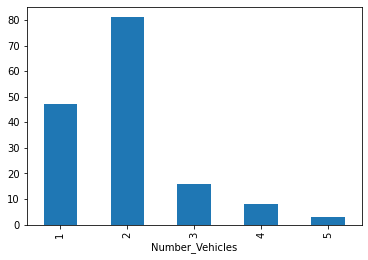

In [ ]:
accident_fatal.groupby('Number_Vehicles')["Severity"].count().plot.bar()

=> Ở mức độ tai nạn gây chết người, thường có 2 phương tiện tham gia.